In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
m = pd.read_csv("movie.csv")

In [4]:
list(m.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [5]:
m.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
m.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
m.shape


(4916, 28)

### Set index of the dataset to the column movie_title

In [8]:
m.set_index('movie_title', inplace = True)

In [9]:
m['actor_1_name']

movie_title
Avatar                                            CCH Pounder
Pirates of the Caribbean: At World's End          Johnny Depp
Spectre                                       Christoph Waltz
The Dark Knight Rises                               Tom Hardy
Star Wars: Episode VII - The Force Awakens        Doug Walker
                                                   ...       
Signed Sealed Delivered                           Eric Mabius
The Following                                     Natalie Zea
A Plague So Pleasant                              Eva Boehnke
Shanghai Calling                                    Alan Ruck
My Date with Drew                                 John August
Name: actor_1_name, Length: 4916, dtype: object

In [10]:
m[['actor_1_name']]

,actor_1_name
movie_title,
Avatar,CCH Pounder
Pirates of the Caribbean: At World's End,Johnny Depp
Spectre,Christoph Waltz
The Dark Knight Rises,Tom Hardy
Star Wars: Episode VII - The Force Awakens,Doug Walker
...,...
Signed Sealed Delivered,Eric Mabius
The Following,Natalie Zea
A Plague So Pleasant,Eva Boehnke


### Create a new dataset which consists of three columns we are interested in.

In [11]:
dc = m[['actor_1_name', 'imdb_score','title_year']]
dc.head()

,actor_1_name,imdb_score,title_year
movie_title,,,
Avatar,CCH Pounder,7.9,2009.0
Pirates of the Caribbean: At World's End,Johnny Depp,7.1,2007.0
Spectre,Christoph Waltz,6.8,2015.0
The Dark Knight Rises,Tom Hardy,8.5,2012.0
Star Wars: Episode VII - The Force Awakens,Doug Walker,7.1,NaN


### We create a condition choosing a specific actor name

In [12]:
condition = m['actor_1_name'] == 'Leonardo DiCaprio'

In [13]:
condition

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: actor_1_name, Length: 4916, dtype: bool

### Drop unknown values from the column title_year

In [14]:
dc1 = dc[condition].dropna()
dc1

,actor_1_name,imdb_score,title_year
movie_title,,,
Titanic,Leonardo DiCaprio,7.7,1997.0
The Great Gatsby,Leonardo DiCaprio,7.3,2013.0
Inception,Leonardo DiCaprio,8.8,2010.0
The Revenant,Leonardo DiCaprio,8.1,2015.0
The Aviator,Leonardo DiCaprio,7.5,2004.0
Django Unchained,Leonardo DiCaprio,8.5,2012.0
Blood Diamond,Leonardo DiCaprio,8.0,2006.0
The Wolf of Wall Street,Leonardo DiCaprio,8.2,2013.0
Gangs of New York,Leonardo DiCaprio,7.5,2002.0


### We sort values in the year column in ascending order

In [15]:
dc2 = dc1.sort_values('title_year',ascending=True)
dc2

,actor_1_name,imdb_score,title_year
movie_title,,,
The Quick and the Dead,Leonardo DiCaprio,6.4,1995.0
Romeo + Juliet,Leonardo DiCaprio,6.8,1996.0
Marvin's Room,Leonardo DiCaprio,6.7,1996.0
Titanic,Leonardo DiCaprio,7.7,1997.0
The Man in the Iron Mask,Leonardo DiCaprio,6.4,1998.0
The Beach,Leonardo DiCaprio,6.6,2000.0
Gangs of New York,Leonardo DiCaprio,7.5,2002.0
Catch Me If You Can,Leonardo DiCaprio,8.0,2002.0
The Aviator,Leonardo DiCaprio,7.5,2004.0


### Convert values in the year column into the integer datatype 

In [16]:
dc2.title_year = dc2.title_year.astype(int)

In [17]:
dc2.head()

,actor_1_name,imdb_score,title_year
movie_title,,,
The Quick and the Dead,Leonardo DiCaprio,6.4,1995
Romeo + Juliet,Leonardo DiCaprio,6.8,1996
Marvin's Room,Leonardo DiCaprio,6.7,1996
Titanic,Leonardo DiCaprio,7.7,1997
The Man in the Iron Mask,Leonardo DiCaprio,6.4,1998


### Create a line graph that shows IMDB scores of DiCaprio movies.

<Figure size 2160x1440 with 0 Axes>

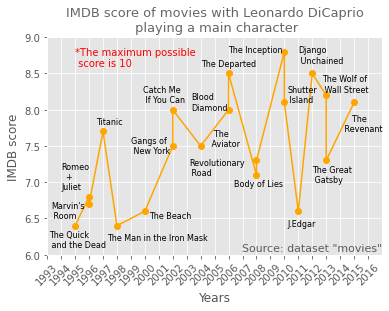

In [20]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(20,10))
dc2.plot('title_year','imdb_score',marker='o', linestyle='solid',color='orange',legend=False)   
first_score=6
last_score=9
plt.ylim(first_score,last_score)
scores=list(range(first_score,last_score))
scores_str =[str(i) for i in range(first_score,last_score)]
plt.xticks(scores,scores_str,rotation=0)
first_year=1993
last_year=2017
plt.xlim(first_year,last_year)
years=list(range(first_year,last_year))
years_str =[str(i) for i in range(first_year,last_year)]
plt.xticks(years,years_str,rotation=45)
plt.title('IMDB score of movies with Leonardo DiCaprio\n playing a main character', alpha=.6,color='black',fontsize=13)
plt.xlabel('Years')
plt.ylabel("IMDB score")
plt.text(1995,8.6,'*The maximum possible\n score is 10', color='red')

plt.text(2006,8.8,'The Inception',fontsize=8)
plt.text(2004,8.6,'The Departed',fontsize=8)
plt.text(2010.2,6.4,'J.Edgar',fontsize=8)
plt.text(1993.1,6.10,'The Quick\n and the Dead',fontsize=8)
plt.text(1997.3,6.2,'The Man in the Iron Mask',fontsize=8)
plt.text(2000.3,6.5,'The Beach',fontsize=8)
plt.text(1993.3,6.5,"Marvin's\n Room",fontsize=8)
plt.text(1994,6.9,'Romeo\n  +\nJuliet',fontsize=8)
plt.text(1996.5,7.8,'Titanic',fontsize=8)
plt.text(1999,7.4,'Gangs of\n New York',fontsize=8)
plt.text(1999.9,8.1,'Catch Me\n If You Can',fontsize=8)
plt.text(2004.6,7.5,'  The\n Aviator',fontsize=8)
plt.text(2003.3,8,'Blood\nDiamond',fontsize=8)
plt.text(2006.4,6.95,'Body of Lies',fontsize=8)
plt.text(2003.2,7.1,'Revolutionary\n Road',fontsize=8)
plt.text(2012.7,8.25,'The Wolf of\n Wall Street',fontsize=8)
plt.text(2012,7,'The Great\n Gatsby',fontsize=8)
plt.text(2011,8.65,'Django\n Unchained',fontsize=8)
plt.text(2010.2,8.1,'Shutter\n Island',fontsize=8)
plt.text(2014.1,7.7,'    The\n Revenant',fontsize=8)
       
plt.text(2007,6.05,'Source: dataset "movies"',fontsize=11,color='black',alpha=0.6)
plt.savefig('dicaprio_imdb.jpg')
plt.show()

In [21]:
m['director_name']

movie_title
Avatar                                            James Cameron
Pirates of the Caribbean: At World's End         Gore Verbinski
Spectre                                              Sam Mendes
The Dark Knight Rises                         Christopher Nolan
Star Wars: Episode VII - The Force Awakens          Doug Walker
                                                    ...        
Signed Sealed Delivered                             Scott Smith
The Following                                               NaN
A Plague So Pleasant                           Benjamin Roberds
Shanghai Calling                                    Daniel Hsia
My Date with Drew                                      Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [22]:
m[['director_name']]

,director_name
movie_title,
Avatar,James Cameron
Pirates of the Caribbean: At World's End,Gore Verbinski
Spectre,Sam Mendes
The Dark Knight Rises,Christopher Nolan
Star Wars: Episode VII - The Force Awakens,Doug Walker
...,...
Signed Sealed Delivered,Scott Smith
The Following,NaN
A Plague So Pleasant,Benjamin Roberds


### We create a return column dividing values of 'gross' column by the values of 'budget' column.

In [24]:
m['return'] = m['gross']/m['budget']

### We create a new dataset with the two columns we are interested in.

In [25]:
sc = m[['director_name', 'return']]
sc.head()

,director_name,return
movie_title,,
Avatar,James Cameron,3.208885
Pirates of the Caribbean: At World's End,Gore Verbinski,1.031347
Spectre,Sam Mendes,0.816629
The Dark Knight Rises,Christopher Nolan,1.792523
Star Wars: Episode VII - The Force Awakens,Doug Walker,NaN


### We create a condition choosing a specific director name

In [26]:
condition2 = m['director_name'] == 'Martin Scorsese'

In [27]:
condition2

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: director_name, Length: 4916, dtype: bool

### Drop unknown values from the column title_year

In [28]:
sc1 = sc[condition2].dropna()
sc1

,director_name,return
movie_title,,
Hugo,Martin Scorsese,0.434236
The Aviator,Martin Scorsese,0.932808
The Wolf of Wall Street,Martin Scorsese,1.168667
Gangs of New York,Martin Scorsese,0.776796
The Departed,Martin Scorsese,1.470816
Shutter Island,Martin Scorsese,1.599605
Casino,Martin Scorsese,0.816121
Mean Streets,Martin Scorsese,0.065290
Cape Fear,Martin Scorsese,2.260000


### We sort values in the year column in ascending order

In [29]:
sc2 = sc1.sort_values('return',ascending=True)
sc2

,director_name,return
movie_title,,
Raging Bull,Martin Scorsese,0.002514
Mean Streets,Martin Scorsese,0.065290
Kundun,Martin Scorsese,0.197582
Bringing Out the Dead,Martin Scorsese,0.302549
Hugo,Martin Scorsese,0.434236
Gangs of New York,Martin Scorsese,0.776796
Casino,Martin Scorsese,0.816121
The Aviator,Martin Scorsese,0.932808
The Age of Innocence,Martin Scorsese,1.066667


### Create a bar graph that shows Martin Scorsese movies statistics success according to their financial return

<Figure size 720x432 with 0 Axes>

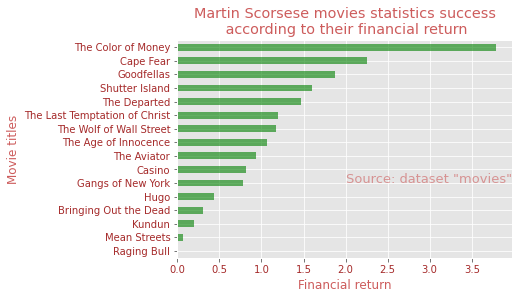

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sc2.plot.barh(alpha=.6,color='green',legend=False)
plt.xticks(rotation='horizontal',color='brown')
plt.yticks(rotation='horizontal',color='brown')
plt.title('Martin Scorsese movies statistics success\n according to their financial return',color='indianred')
plt.xlabel('Financial return',color='indianred')
plt.ylabel('Movie titles',color='indianred')
plt.text(2,5,'Source: dataset "movies"',fontsize=13,color='indianred',alpha=0.6)
plt.savefig('scorsese_return.jpg')
plt.show()

### Create new dataset by grouping two columns, finding the sum of values in one of the columns for a 
### specific object in another column and sort the lines of a new set in ascending order.

In [31]:
g = m.groupby("actor_1_name")['actor_1_facebook_likes'].sum().sort_values(ascending=True).tail(20)
g

actor_1_name
Nicolas Cage               384000.0
Joseph Gordon-Levitt       391000.0
Kevin Spacey               396000.0
Keanu Reeves               396000.0
Gerard Butler              396000.0
Philip Seymour Hoffman     440000.0
Christian Bale             506000.0
Jennifer Lawrence          510000.0
Denzel Washington          522000.0
Ryan Gosling               528000.0
Robert Downey Jr.          546000.0
Leonardo DiCaprio          580000.0
Darcy Donavan              640000.0
Jason Statham              650000.0
J.K. Simmons               696000.0
Jimmy Bennett              696000.0
Matthew Ziff               780000.0
Robert De Niro            1056000.0
Robin Williams            1323000.0
Johnny Depp               1440000.0
Name: actor_1_facebook_likes, dtype: float64

### Create a bar graph that lists the most liked actors on Facebook.

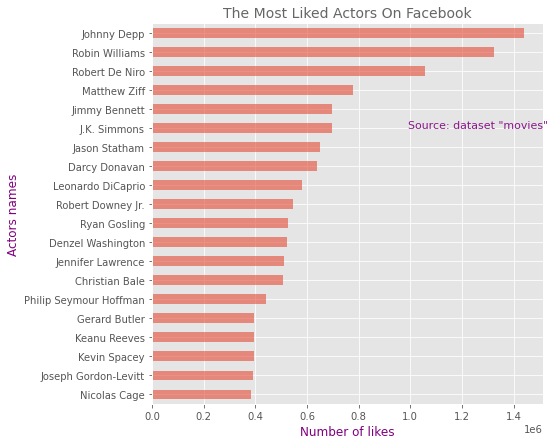

In [32]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(7,7))
g.plot.barh(alpha=.6,width=0.5)

plt.title('The Most Liked Actors On Facebook', alpha=.6,color='black',fontsize=14)
plt.xlabel('Number of likes',color='purple')
plt.ylabel("Actors names",color='purple')
plt.text(990700,14,'Source: dataset "movies"',fontsize=11,color='purple',alpha=0.9)
plt.savefig('liked_on_fb.jpg')
plt.show()

### Import seaborn library

In [33]:
import seaborn as sns

### Create a boxplot that shows movies duration

C:\Users\olgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


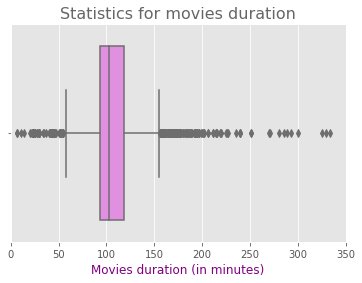

In [34]:
sns.boxplot('duration',data=m,color='violet')
plt.style.use("ggplot")
first_score=0
last_score=350
plt.xlim(first_score,last_score)
plt.title('Statistics for movies duration', alpha=.6,color='black',fontsize=16)
plt.xlabel('Movies duration (in minutes)',color='purple')
plt.savefig('movies_duration.jpg')
plt.show()

### Create a countplot that illustrates IMDB score statistics for the movies of the whole dataset

C:\Users\olgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


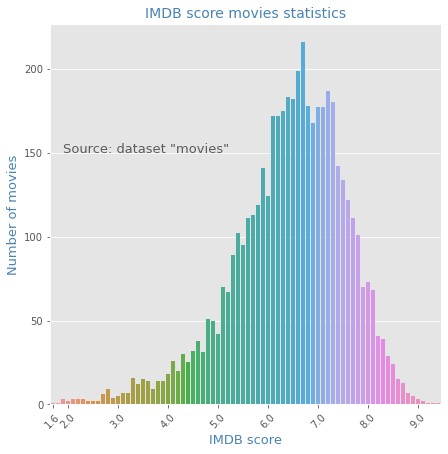

In [39]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(7,7))
sns.countplot('imdb_score', data=m)
plt.xticks(rotation='horizontal')

plt.title('IMDB score movies statistics', alpha=.99,fontsize=14,color='steelblue')
plt.xlabel('IMDB score',alpha=.99,fontsize=13,color='steelblue')
plt.ylabel("Number of movies",alpha=.99,fontsize=13,color='steelblue')
plt.xticks([0,3,13,23,33,43,53,63,73], rotation=45)
plt.text(2,150,'Source: dataset "movies"',fontsize=13,color='black',alpha=0.6)
plt.savefig('imdb_score.jpg')
plt.show()